<a href="https://colab.research.google.com/github/aterterian/18S191/blob/master/BigDataPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Handling big data in PyTorch**

> **Terterian Achot**



> > Big Data class of Professor Patrick Glauner

> > 2020-21 Winter Term 

> > Deggendorf Institute of Technology





In [4]:
!pip install torch

# **Init, helpers, utils, ...**

In [15]:
import torch
print(torch.__version__)

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

1.7.0+cu101
3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [6]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

In [ ]:
import sys
print(sys.version)

# **Tensors**
tensors - the atoms of machine learning

## Tensors in numpy and pytorch

In [10]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

In [11]:
# numpy
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
# torch
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
# numpy
X = np.random.random((5, 3))
X

array([[0.01761407, 0.22226662, 0.10141616],
       [0.29994794, 0.52538242, 0.63938118],
       [0.67686391, 0.6255289 , 0.12404051],
       [0.97030623, 0.90453374, 0.0239299 ],
       [0.19845467, 0.00667336, 0.77244887]])

In [ ]:
# pytorch
Y = torch.rand((5, 3))
Y

tensor([[0.2812, 0.8975, 0.3753],
        [0.1442, 0.3561, 0.7479],
        [0.8167, 0.1642, 0.0646],
        [0.8707, 0.1257, 0.0439],
        [0.5695, 0.9224, 0.2349]])

In [ ]:
X.shape

(5, 3)

In [ ]:
Y.shape

torch.Size([5, 3])

In [ ]:
# numpy
X.T @ X

array([[1.52930221, 1.46389941, 0.45404138],
       [1.46389941, 1.53494135, 0.46285221],
       [0.45404138, 0.46285221, 1.03172948]])

In [ ]:
# torch
Y.t() @ Y

tensor([[1.8492, 1.0725, 0.4381],
        [1.0725, 1.8258, 0.8359],
        [0.4381, 0.8359, 0.7614]])

In [ ]:
# numpy
inv(X.T @ X)

array([[ 7.52001688, -7.139912  , -0.1063019 ],
       [-7.139912  ,  7.53243033, -0.23706458],
       [-0.1063019 , -0.23706458,  1.12237883]])

In [ ]:
# torch
torch.inverse(Y.t() @ Y)

tensor([[ 0.8252, -0.5376,  0.1153],
        [-0.5376,  1.4514, -1.2841],
        [ 0.1153, -1.2841,  2.6567]])

## More on PyTorch Tensors

Operations are also available as methods.

In [7]:
A = torch.eye(3)
A.add(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [8]:
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Any operation that mutates a tensor in-place has a `_` suffix.

In [9]:
A.add_(1)
A

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

## Indexing and broadcasting
It works as expected/like numpy:

In [ ]:
A[0, 0]

tensor(2.)

In [ ]:
A[0]

tensor([2., 1., 1.])

In [ ]:
A[0:2]

tensor([[2., 1., 1.],
        [1., 2., 1.]])

In [ ]:
A[:, 1:3]

tensor([[1., 1.],
        [2., 1.],
        [1., 2.]])

## Converting

In [ ]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
# torch --> numpy
B = A.numpy()
B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

Note: torch and numpy can share the same memory / zero-copy

In [ ]:
A.add_(.5)
A

tensor([[1.5000, 0.5000, 0.5000],
        [0.5000, 1.5000, 0.5000],
        [0.5000, 0.5000, 1.5000]])

In [ ]:
B

array([[1.5, 0.5, 0.5],
       [0.5, 1.5, 0.5],
       [0.5, 0.5, 1.5]], dtype=float32)

In [ ]:
# numpy --> torch
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

## Much more

In [ ]:
[o for o in dir(torch) if not o.startswith("_")]

In [ ]:
[o for o in dir(A) if not o.startswith("_")]

# **How do I use the GPU?**

If you have a GPU make sure that the right pytorch is installed
(check https://pytorch.org/ for details).

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

If you have a GPU you should get something like: 
`device(type='cuda', index=0)`

You can move data to the GPU by doing `.to(device)`.

In [10]:
data = torch.eye(3)
data = data.to(device)
data

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')

Now the computation happens on the GPU.

In [11]:
res = data + data
res

tensor([[2., 0., 0.],
        [0., 2., 0.],
        [0., 0., 2.]], device='cuda:0')

In [12]:
res.device

device(type='cuda', index=0)

# **Automatic differentiation with `autograd`**

Ref:
- https://pytorch.org/docs/stable/autograd.html
- https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

You rarely use `torch.autograd` directly.
Pretty much everything is part or `torch.Tensor` now.
Simply add `requires_grad=True` to the tensors you want to calculate the gradients for.
`nn.Module` track gradients automatically.

In [ ]:
from torch import autograd

In [ ]:
x = torch.tensor(2.)
x

tensor(2.)

In [ ]:
x = torch.tensor(2., requires_grad=True)
x

tensor(2., requires_grad=True)

In [ ]:
print(x.requires_grad)

True


In [ ]:
print(x.grad)

None


In [ ]:
y = x ** 2

print("Grad of x:", x.grad)

Grad of x: None


In [ ]:
y = x ** 2
y.backward()

print("Grad of x:", x.grad)

Grad of x: tensor(4.)


In [ ]:
# What is going to happen here?
# x = torch.tensor(2.)
# x.backward()

In [ ]:
# Don't record the gradient
# Useful for inference

params = torch.tensor(2., requires_grad=True)

with torch.no_grad():
    y = x * x
    print(x.grad_fn)

None


`nn.Module` and `nn.Parameter` keep track of gradients for you.

In [ ]:
lin = nn.Linear(2, 1, bias=True)
lin.weight

Parameter containing:
tensor([[-0.3140, -0.0996]], requires_grad=True)

In [ ]:
type(lin.weight)

torch.nn.parameter.Parameter

In [ ]:
isinstance(lin.weight, torch.FloatTensor)

True

# **torch.nn**
The neural network modules contains many different layers.

In [ ]:
from torch import nn

In [ ]:
lin_reg = nn.Linear(1, 1, bias=True)
lin_reg

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
nn.Conv2d

torch.nn.modules.conv.Conv2d

In [ ]:
nn.Conv3d

torch.nn.modules.conv.Conv3d

In [ ]:
nn.BatchNorm2d

torch.nn.modules.batchnorm.BatchNorm2d

### Activations

In [ ]:
nn.ReLU

torch.nn.modules.activation.ReLU

In [ ]:
nn.Sigmoid

torch.nn.modules.activation.Sigmoid

### Losses

In [ ]:
nn.Softmax

torch.nn.modules.activation.Softmax

In [ ]:
nn.CrossEntropyLoss

torch.nn.modules.loss.CrossEntropyLoss

In [ ]:
nn.BCELoss

torch.nn.modules.loss.BCELoss

In [ ]:
nn.MSELoss

torch.nn.modules.loss.MSELoss

### Functional (stateless) alternatives

In [ ]:
from torch.nn import functional as F

In [ ]:
F.mse_loss

<function torch.nn.functional.mse_loss(input, target, size_average=None, reduce=None, reduction='mean')>

In [ ]:
F.relu

<function torch.nn.functional.relu(input: torch.Tensor, inplace: bool = False) -> torch.Tensor>

In [ ]:
F.relu6

<function torch.nn.functional.relu6(input, inplace=False)>

## `torch.optim`

In [ ]:
from torch import optim

In [ ]:
optim.SGD

torch.optim.sgd.SGD

In [ ]:
optim.Adam

torch.optim.adam.Adam

In [ ]:
optim.AdamW

torch.optim.adamw.AdamW

# **Debugging**

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Q: "No debugger for your code. What do you think?"**

**A: "I would NOT be able to code!"**

- Who does "print-line-debugging"?
- Who likes debugging in tensorflow?
- What is the intersection of those two groups?


## IPDB cheatsheet
IPython Debugger

Taken from http://wangchuan.github.io/coding/2017/07/12/ipdb-cheat-sheet.html

- h(help): Print help

- n(ext): Continue execution until the next line in the current function is reached or it returns.
- s(tep): Execute the current line, stop at the first possible occasion (either in a function that is called or in the current function).
- r(eturn): Continue execution until the current function returns.
- c(ont(inue)): Continue execution, only stop when a breakpoint is encountered.

- r(eturn): Continue execution until the current function returns.
- a(rgs): Print the argument list of the current function.

Note: Python 3.7 has `breakpoint()` built-in! [[PEP 553]](https://www.python.org/dev/peps/pep-0553/)

In [ ]:
from IPython.core.debugger import set_trace

In [ ]:
def my_function(x):
    answer = 42
    # set_trace()  # <-- uncomment!
    answer += x
    return answer

my_function(12)

54

## Example: debuging a NN

In [ ]:
X = torch.rand((5, 3))
X

tensor([[0.4467, 0.0772, 0.7921],
        [0.8916, 0.5952, 0.2477],
        [0.9442, 0.3809, 0.3629],
        [0.3867, 0.1336, 0.0256],
        [0.1272, 0.6342, 0.3937]])

In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3, 1)
    
    def forward(self, X):
        # set_trace()
        x = self.lin(X)
        return X

    
model = MyModule()
y_ = model(X)

# assert y_.shape == (5, 1), y_.shape

## Debug Layer

In [ ]:
class DebugModule(nn.Module):
    def forward(self, x):
        set_trace()
        return x

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 5),
    DebugModule(),
    nn.Linear(5, 1),
)

In [ ]:
X = torch.unsqueeze(torch.tensor([1.]), dim=0)
# model(X)

## Tensorboard and `tensorboardX`
Tensorboard and `tensorboardX` are also great to debug a model, e.g. to look at the gradients.

# **Storing and Loading Models**

https://pytorch.org/tutorials/beginner/saving_loading_models.html

## Init, helpers, utils, ...

In [16]:
%matplotlib inline

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

# `state_dict()`

## `nn.Module.state_dict()`
`nn.Module` contain state dict, that maps each layer to the learnable parameters.

In [19]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [20]:
model = Net()

In [ ]:
model.state_dict()

In [22]:
def state_dict_info(obj):
    print(f"{'layer':25} shape")
    print("===================================================")
    for k,v in obj.state_dict().items():
        try:
            print(f"{k:25} {v.shape}")
        except AttributeError:
            print(f"{k:25} {v}")

In [23]:
state_dict_info(model)

layer                     shape
conv1.weight              torch.Size([6, 3, 5, 5])
conv1.bias                torch.Size([6])
conv2.weight              torch.Size([16, 6, 5, 5])
conv2.bias                torch.Size([16])
fc1.weight                torch.Size([120, 400])
fc1.bias                  torch.Size([120])
fc2.weight                torch.Size([84, 120])
fc2.bias                  torch.Size([84])
fc3.weight                torch.Size([10, 84])
fc3.bias                  torch.Size([10])


## `nn.Optimizer`

Optimizers also have a a `state_dict`.

In [24]:
optimizer = optim.Adadelta(model.parameters())

In [25]:
state_dict_info(optimizer)

layer                     shape
state                     {}
param_groups              [{'lr': 1.0, 'rho': 0.9, 'eps': 1e-06, 'weight_decay': 0, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


In [26]:
optimizer.state_dict()["state"]

{}

In [27]:
optimizer.state_dict()["param_groups"]

[{'eps': 1e-06,
  'lr': 1.0,
  'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  'rho': 0.9,
  'weight_decay': 0}]

## Storing and loading `state_dict`

In [28]:
model_file = "model_state_dict.pt"
torch.save(model.state_dict(), model_file)

In [29]:
model = Net()
model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

## Storing and loading the full model

In [30]:
model_file = "model_123.pt"
torch.save(model, model_file)

In [31]:
# Only works if code for `Net` is available right now
model = torch.load(model_file)

# Example Checkpointing
You can store model, optimizer and arbitrary information and reload it.

Example:
```python
torch.save(
    {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
        'loss': loss,
    },
    PATH,
)
```

# Working with Data: `Dataset`, `DataLoader`, `Sampler`, and `Transforms`

These basic concepts make it easy to work with large data.

## Init, helpers, utils, ...

In [ ]:
%matplotlib inline

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

# Dataset
It's easy to create your `Dataset`,
but PyTorch comes with some
[build-in datasets](https://pytorch.org/docs/stable/torchvision/datasets.html):

- MNIST
- Fashion-MNIST
- KMNIST
- EMNIST
- FakeData
- COCO
  - Captions
  - Detection
- LSUN
- ImageFolder
- DatasetFolder
- Imagenet-12
- CIFAR
- STL10
- SVHN
- PhotoTour
- SBU
- Flickr
- VOC
- Cityscapes

`Dataset` gives you information about the number of samples (implement `__len__`) and gives you the sample at a given index (implement `__getitem__`.
It's a nice and simple abstraction to work with data.

In [ ]:
from torch.utils.data import Dataset

```python
class Dataset(object):
    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])
```

The `ImageFolder` dataset is quite useful and follows the usual conventions for folder layouts:

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

## Example: dogs and cats dataset
https://www.kaggle.com/chetankv/dogs-cats-images

In [ ]:
!tree -d dogscats/

dogscats/
├── test_set
│   ├── cats
│   └── dogs
└── training_set
    ├── cats
    └── dogs

6 directories


In [ ]:
from torchvision.datasets.folder import ImageFolder

train_ds = ImageFolder("dogscats/training_set/")

In [ ]:
train_ds

Dataset ImageFolder
    Number of datapoints: 8000
    Root location: dogscats/training_set/

In [ ]:
# the __len__ method
len(train_ds)

8000

In [ ]:
# the __getitem__ method
train_ds[0]

(<PIL.Image.Image image mode=RGB size=300x280 at 0x7FA224AFD100>, 0)

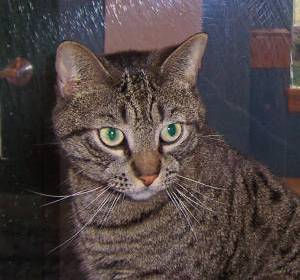

In [ ]:
train_ds[0][0]

In [ ]:
train_ds[0][1]

0

Optionally, some datasets offer convenience functions and attributes.
This is not enforced by the interface! Don't rely on it!

In [ ]:
train_ds.classes

['cats', 'dogs']

In [ ]:
train_ds.class_to_idx

{'cats': 0, 'dogs': 1}

In [ ]:
train_ds.imgs

1 dogs 6281


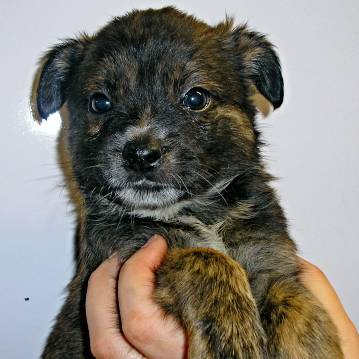

0 cats 2312


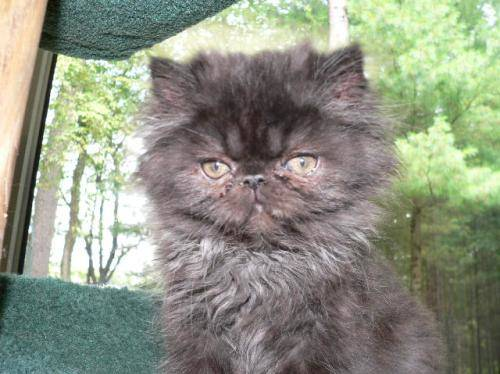

1 dogs 6366


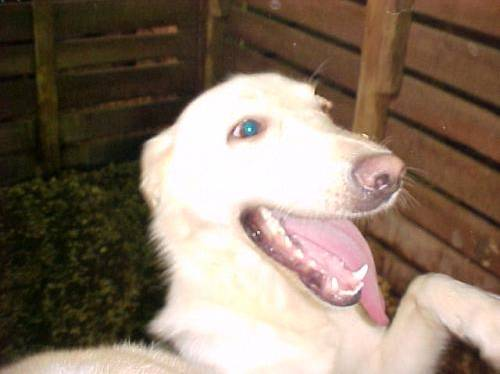

1 dogs 4567


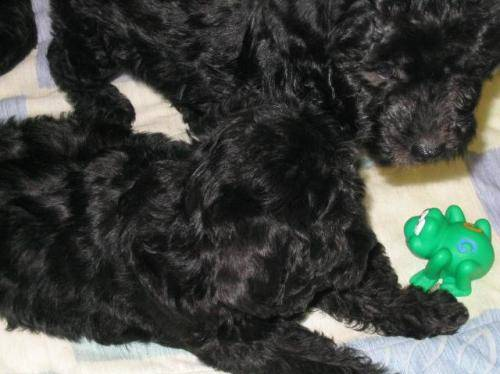

In [ ]:
import random

rand_idx = np.random.randint(0, len(train_ds), 4)
for i in rand_idx:
    img, label_id = train_ds[i]
    print(label_id, train_ds.classes[label_id], i)
    display(img)

# `torchvision.transforms`

Common image transformation that can be composed/chained [[docs]](https://pytorch.org/docs/stable/torchvision/transforms.html).

In [ ]:
from torchvision import transforms

In [ ]:
_image_size = 224
_mean = [0.485, 0.456, 0.406]
_std = [0.229, 0.224, 0.225]


trans = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(_image_size),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(.3, .3, .3),
    transforms.ToTensor(),
    transforms.Normalize(_mean, _std),
])

trans(train_ds[7074][0])

tensor([[[-0.4739, -0.5424, -0.5767,  ..., -1.3987, -1.3987, -1.3987],
         [-0.4397, -0.4568, -0.4911,  ..., -1.4158, -1.3987, -1.3987],
         [-0.3198, -0.3712, -0.4397,  ..., -1.3987, -1.3815, -1.3644],
         ...,
         [-1.3815, -1.3815, -1.3815,  ..., -0.6109, -0.6452, -0.6794],
         [-1.3815, -1.3815, -1.3815,  ..., -0.6965, -0.7308, -0.7479],
         [-1.3815, -1.3815, -1.3815,  ..., -0.7137, -0.7137, -0.7308]],

        [[-0.5826, -0.6352, -0.6877,  ..., -1.3004, -1.3004, -1.3004],
         [-0.5301, -0.5651, -0.6001,  ..., -1.3179, -1.3004, -1.3004],
         [-0.4076, -0.4776, -0.5301,  ..., -1.3004, -1.2829, -1.2654],
         ...,
         [-1.0378, -1.0378, -1.0378,  ..., -0.1800, -0.1975, -0.2500],
         [-1.0378, -1.0378, -1.0378,  ..., -0.2675, -0.3025, -0.3200],
         [-1.0378, -1.0378, -1.0378,  ..., -0.3025, -0.3025, -0.3200]],

        [[-0.5670, -0.6367, -0.7064,  ..., -1.0724, -1.0724, -1.0724],
         [-0.5321, -0.5844, -0.6890,  ..., -1

## `torchvision.transforms.functional`

>Functional transforms give you fine-grained control of the transformation pipeline. As opposed to the transformations above, functional transforms don’t contain a random number generator for their parameters. That means you have to specify/generate all parameters, but you can reuse the functional transform. For example, you can apply a functional transform to multiple images like this:
>
> https://pytorch.org/docs/stable/torchvision/transforms.html#functional-transforms

```python
import torchvision.transforms.functional as TF
import random

def my_segmentation_transforms(image, segmentation):
    if random.random() > 5:
        angle = random.randint(-30, 30)
        image = TF.rotate(image, angle)
        segmentation = TF.rotate(segmentation, angle)
    # more transforms ...
    return image, segmentation
```

Ref:
- https://pytorch.org/docs/stable/torchvision/transforms.htm
- https://pytorch.org/docs/stable/torchvision/transforms.html#functional-transforms
- https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
- https://github.com/mdbloice/Augmentor
- https://github.com/aleju/imgaug

Shout-out:
- Hig performance image augmentation with pillow-simd [[github]](https://github.com/uploadcare/pillow-simd) [[benchmark]](http://python-pillow.org/pillow-perf/)
- Improving Deep Learning Performance with AutoAugment [[blog]](https://ai.googleblog.com/2018/06/improving-deep-learning-performance.html) [[paper]](https://arxiv.org/abs/1805.09501) [[pytorch implementation]](https://github.com/DeepVoltaire/AutoAugment)

# Dataloader
The `DataLoader` class offers batch loading of datasets with multi-processing and different sample strategies [[docs]](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

The signature looks something like this:
```python
DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    sampler=None,
    batch_sampler=None,
    num_workers=0,
    collate_fn=default_collate,
    pin_memory=False,
    drop_last=False,
    timeout=0,
    worker_init_fn=None
)
```

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_ds = ImageFolder("dogscats/training_set/", transform=trans)
train_dl = DataLoader(
    train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=4,
)

In [ ]:
train_iter = iter(train_dl)
X, y = next(train_iter)

In [ ]:
print("X:", X.shape)
print("y:", y.shape)

X: torch.Size([2, 3, 224, 224])
y: torch.Size([2])


Note that I passed `trans`, which returns `torch.Tensor`, not pillow images.
DataLoader expects tensors, numbers, dicts or lists.

In [ ]:
_train_ds = ImageFolder("dogscats/test_set/", transform=trans) 
_train_dl = DataLoader(_train_ds, batch_size=2, shuffle=True)

## `collate_fn`
The `collate_fn` argument of `DataLoader` allows you to customize how single datapoints are put together into a batch.
`collate_fn` is a simple callable that gets a list of datapoints (i.e. what `dataset.__getitem__` returns).

Example of a custom `collate_fn`
(taken from [here](https://discuss.pytorch.org/t/how-to-create-a-dataloader-with-variable-size-input/8278/3)):

In [ ]:
def my_collate_fn(list_of_x_y):
    data = [item[0] for item in list_of_x_y]
    target = [item[1] for item in list_of_x_y]
    target = torch.LongTensor(target)
    return [data, target]

# Sampler
`Sampler` define **how** to sample from the dataset [[docs]](https://pytorch.org/docs/stable/data.html#torch.utils.data.sampler.Sampler).

Examples:
- `SequentialSampler`
- `RandomSamples`
- `SubsetSampler`
- `WeightedRandomSampler`

Write your own by simply implementing `__iter__` to iterate over the indices of the dataset.

```python
class Sampler(object):
    def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError
```

# Recap
- `Dataset`: get one datapoint
- `transforms`: composable transformations
- `DataLoader`: combine single datapoints into batches (plus multi processing and more)
- `Sampler`: **how** to sample from a dataset

**Simple but extensible interfaces**

# Exercise
Go out and play:

- Maybe extend the `DogsCatsDataset` such that you can specify the size of dataset, i.e. the number of samples.
- Maybe try the `Subset` [[docs]](https://pytorch.org/docs/stable/data.html#torch.utils.data.Subset) to create smaller datasets.
- Maybe create `SubsetFraction` where you can specify the size of the dataset (between 0. and 1.).
- Maybe write a custom collate function for the `DogsCatsDataset` that turns it into a dataset appropriate to use in an autoencoder settings.

In [ ]:
def autoencoder_collate_fn(list_of_x_y):
    # TODO implement me
    pass

In [ ]:
class MyDataSet(Dataset):
    def __init__(self):
        super().__init__()
        # TODO implement me
    
    def __len__(self):
        # TODO implement me
        pass
    
    def __getitem__(self, idx):
        # TODO implement me
        pass